# 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (12, 8)


In [5]:
file_path = 'Final_data.csv'
df = pd.read_csv(file_path)


In [6]:
print("Wczytano dane")
print("\nInformacje techniczne o tabeli:")
df.info()

print("\nPierwsze 5 wierszy naszej tabeli:")
df.head()


Wczytano dane

Informacje techniczne o tabeli:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


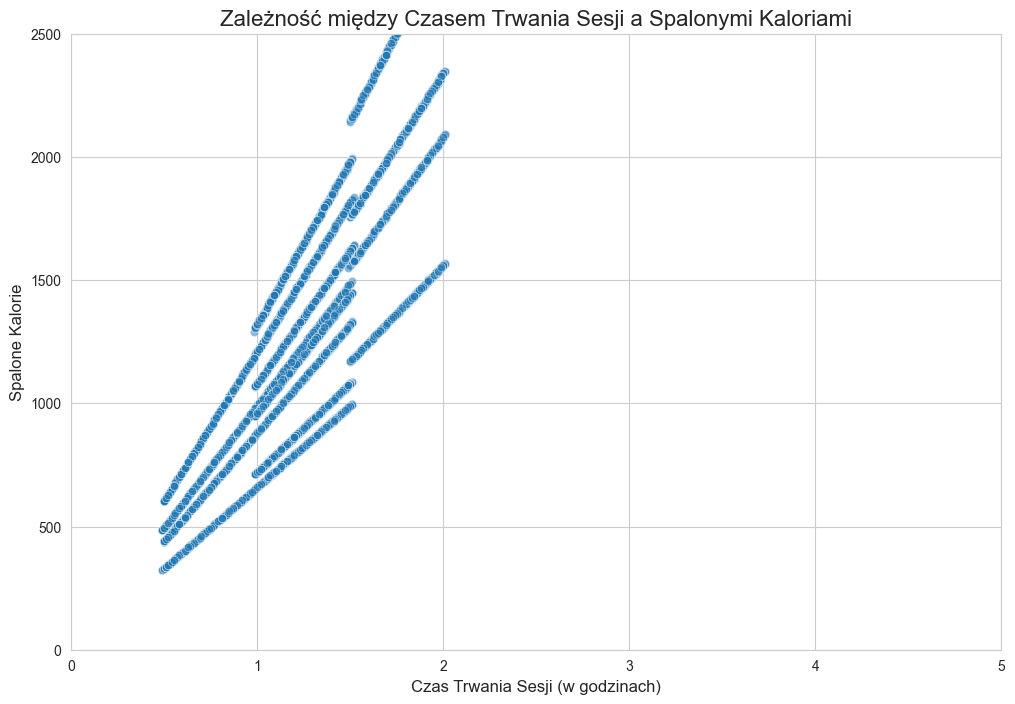

In [9]:
#ANALIZA ZALEŻNOŚCI: CZAS TRENINGU vs. SPALONE KALORIE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df, alpha=0.5)
plt.title('Zależność między Czasem Trwania Sesji a Spalonymi Kaloriami', fontsize=16)
plt.xlabel('Czas Trwania Sesji (w godzinach)', fontsize=12)
plt.ylabel('Spalone Kalorie', fontsize=12)
plt.xlim(0, 5)
plt.ylim(0, 2500)

plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
cechy = ['Age', 'Workout_Frequency (days/week)', 'protein_per_kg', 'Calories_Burned', 'Resting_BPM']
df_segmentacja = df[cechy]

In [12]:
scaler = StandardScaler()
df_skalowane = scaler.fit_transform(df_segmentacja)

In [13]:
iner_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_skalowane)
    iner_list.append(kmeans.inertia_)

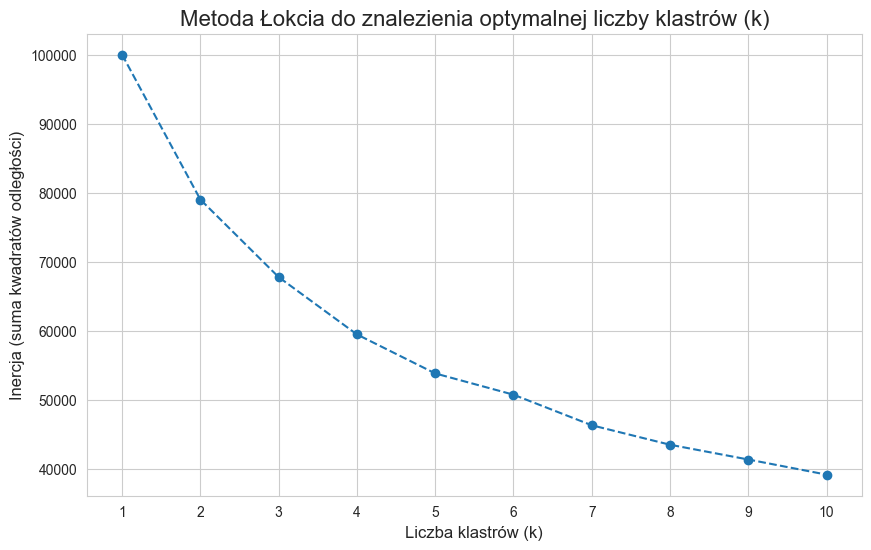

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), iner_list, marker='o', linestyle='--')
plt.title('Metoda Łokcia do znalezienia optymalnej liczby klastrów (k)', fontsize=16)
plt.xlabel('Liczba klastrów (k)', fontsize=12)
plt.ylabel('Inercja (suma kwadratów odległości)', fontsize=12)
plt.xticks(range(1, 11))
plt.show()


In [15]:
optymalna_liczba_klastrow = 4
kmeans = KMeans(n_clusters=optymalna_liczba_klastrow, random_state=42, n_init='auto')

In [16]:
segmenty = kmeans.fit_predict(df_skalowane)

In [17]:
df_segmentacja['Segment'] = segmenty

C:\Users\mdzik\AppData\Local\Temp\ipykernel_20844\2534845132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentacja['Segment'] = segmenty


In [18]:
print("Dodano kolumnę 'Segment' do naszej tabeli. Oto pierwsze 5 wierszy:")
print(df_segmentacja.head())

Dodano kolumnę 'Segment' do naszej tabeli. Oto pierwsze 5 wierszy:
     Age  Workout_Frequency (days/week)  protein_per_kg  Calories_Burned  \
0  34.91                           3.99        1.624789          1080.90   
1  23.37                           4.00        1.514093          1809.91   
2  33.20                           2.99        1.663445           802.26   
3  38.69                           3.99        0.862017          1450.79   
4  45.09                           4.00        2.538153          1166.40   

   Resting_BPM  Segment  
0        69.05        3  
1        73.18        1  
2        54.96        2  
3        50.07        0  
4        70.84        3  


In [19]:
print("\nLiczba klientów w każdym z nowo odkrytych segmentów:")
print(df_segmentacja['Segment'].value_counts())



Liczba klientów w każdym z nowo odkrytych segmentów:
Segment
2    5769
0    5108
1    4780
3    4343
Name: count, dtype: int64


In [20]:
x_axis = 'Age'
y_axis = 'Calories_Burned'

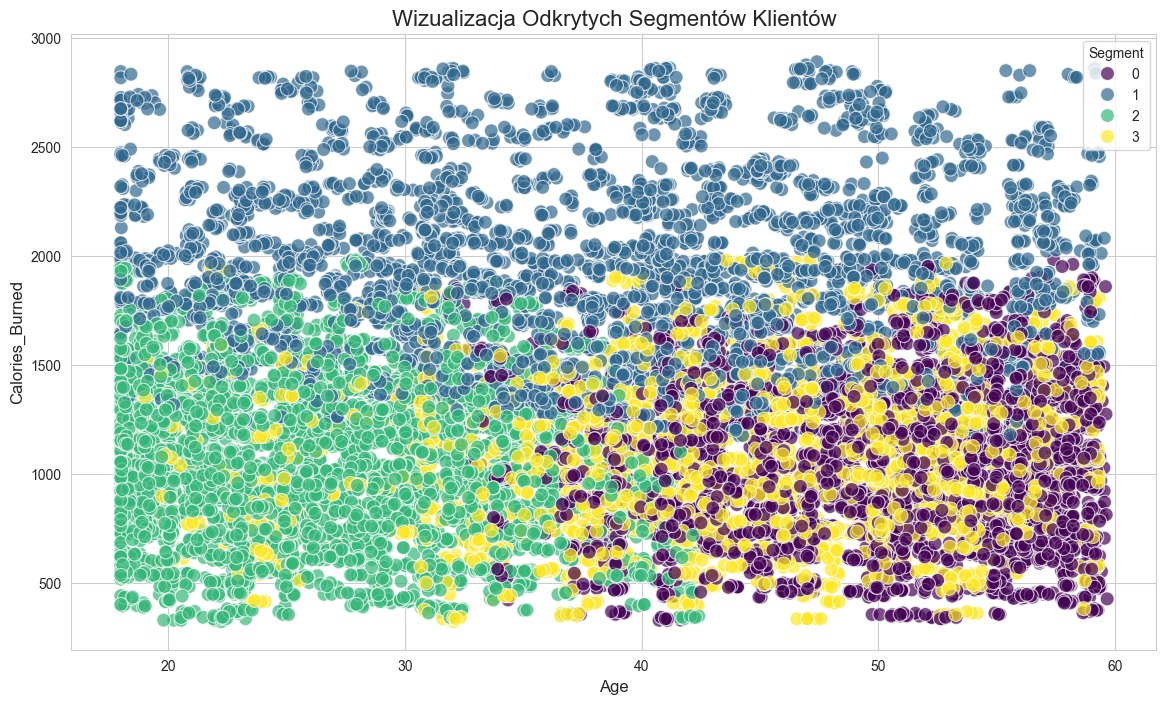

In [23]:

plt.figure(figsize=(14, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue='Segment', data=df_segmentacja, palette='viridis', s=100, alpha=0.7)


plt.title('Wizualizacja Odkrytych Segmentów Klientów', fontsize=16)
plt.xlabel(x_axis, fontsize=12)
plt.ylabel(y_axis, fontsize=12)
plt.legend(title='Segment')
plt.show()

Profile naszych segmentów (średnie wartości cech):
           Age  Workout_Frequency (days/week)  protein_per_kg  \
Segment                                                         
0        49.29                           3.00            1.24   
1        38.04                           4.41            1.39   
2        26.52                           2.91            1.27   
3        43.84                           3.03            2.05   

         Calories_Burned  Resting_BPM  
Segment                                
0                1078.95        57.80  
1                1906.66        62.47  
2                1069.14        62.34  
3                1107.34        66.87  


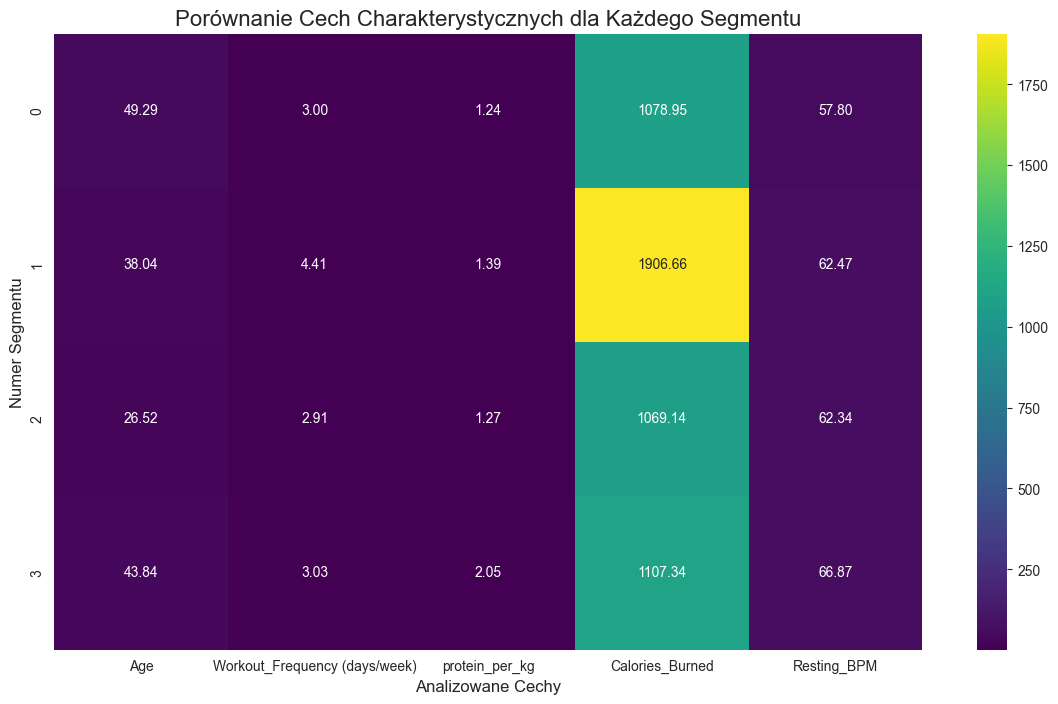

In [25]:

segment_profiles = df_segmentacja.groupby('Segment').mean().round(2)

print("Profile naszych segmentów (średnie wartości cech):")
print(segment_profiles)

#Wizualizacja profili
plt.figure(figsize=(14, 8))
sns.heatmap(segment_profiles, annot=True, cmap='viridis', fmt='.2f')

plt.title('Porównanie Cech Charakterystycznych dla Każdego Segmentu', fontsize=16)
plt.xlabel('Analizowane Cechy', fontsize=12)
plt.ylabel('Numer Segmentu', fontsize=12)
plt.show()

In [28]:
# mapa korelacji
import numpy as np
df_numeric = df.select_dtypes(include=np.number)

In [29]:
korelacje = df_numeric.corr()

In [30]:
najwazniejsze_cechy = korelacje['Fat_Percentage'].abs().sort_values(ascending=False)

In [31]:
print("Cechy najsilniej skorelowane z Procentem Tkanki Tłuszczowej:")
print(najwazniejsze_cechy.head(15))

Cechy najsilniej skorelowane z Procentem Tkanki Tłuszczowej:
Fat_Percentage                    1.000000
BMI_calc                          0.902341
BMI                               0.902341
Weight (kg)                       0.778875
Calories                          0.759601
lean_mass_kg                      0.659078
protein_per_kg                    0.603368
cal_balance                       0.594499
Water_Intake (liters)             0.185207
Burns Calories (per 30 min)_bc    0.178974
Height (m)                        0.156586
Max_BPM                           0.071926
Burns Calories (per 30 min)       0.054499
Daily meals frequency             0.052791
prep_time_min                     0.042992
Name: Fat_Percentage, dtype: float64


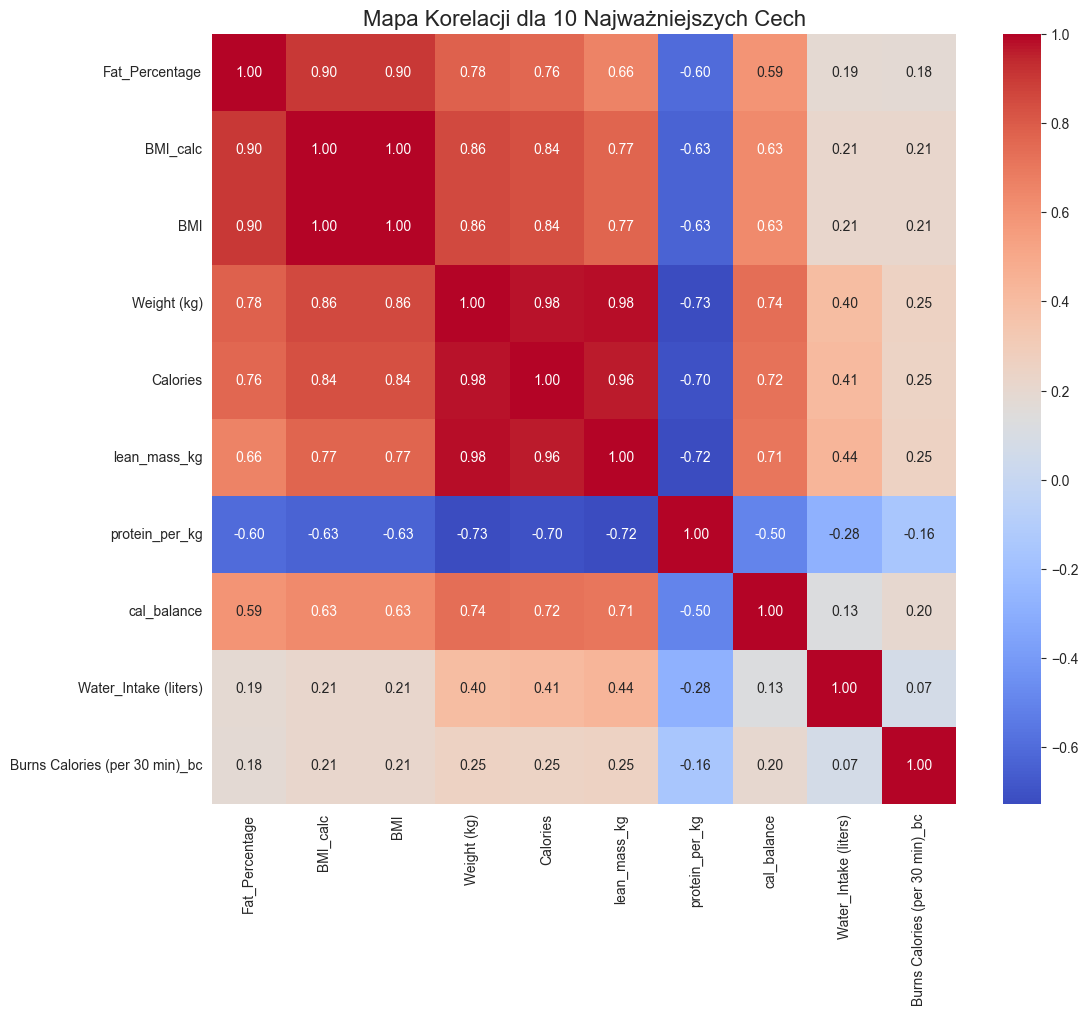

In [33]:
top_10_cechy = najwazniejsze_cechy.head(10).index
korelacje_top_10 = df[top_10_cechy].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(korelacje_top_10, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa Korelacji dla 10 Najważniejszych Cech', fontsize=16)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
!py -m pip install xgboost
from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\mdzik\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)


In [36]:
cechy_numeryczne = ['BMI', 'lean_mass_kg', 'protein_per_kg', 'cal_balance', 'Resting_BPM']
cechy_kategoryczne = ['Gender', 'Workout_Type', 'diet_type']


In [37]:
cel = 'Fat_Percentage'

In [38]:
df_model = df[cechy_numeryczne + cechy_kategoryczne + [cel]]

In [39]:
#One-Hot Encoding
df_model = pd.get_dummies(df_model, columns=cechy_kategoryczne, drop_first=True)

In [40]:
X = df_model.drop(cel, axis=1)
y = df_model[cel]              

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [43]:
y_pred = model.predict(X_test)

In [44]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"--- WYNIKI MODELU ---")
print(f"Współczynnik R-kwadrat (R²): {r2:.3f}")
print(f"Średni Błąd Bezwzględny (MAE): {mae:.3f}")
print(f"\nInterpretacja: Nasz model, przewidując procent tkanki tłuszczowej, myli się średnio o {mae:.3f} punktu procentowego.")

--- WYNIKI MODELU ---
Współczynnik R-kwadrat (R²): 0.895
Średni Błąd Bezwzględny (MAE): 1.230

Interpretacja: Nasz model, przewidując procent tkanki tłuszczowej, myli się średnio o 1.230 punktu procentowego.


In [45]:
# nowe cechy
cechy_numeryczne = ['Age', 'Resting_BPM', 'Workout_Frequency (days/week)', 'cal_balance', 'protein_per_kg', 'Water_Intake (liters)']
cechy_kategoryczne = ['Gender', 'Workout_Type', 'diet_type']
cel = 'Fat_Percentage'

In [47]:
df_model = df[cechy_numeryczne + cechy_kategoryczne + [cel]]
df_model = pd.get_dummies(df_model, columns=cechy_kategoryczne, drop_first=True)

In [48]:
X = df_model.drop(cel, axis=1)
y = df_model[cel]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model_uczciwy = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
model_uczciwy.fit(X_train, y_train)

y_pred_uczciwy = model_uczciwy.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred_uczciwy)
mae = mean_absolute_error(y_test, y_pred_uczciwy)

In [53]:
print(f"WYNIKI NOWEGO, UCZCIWEGO MODELU")
print(f"Współczynnik R-kwadrat (R²): {r2:.3f}")
print(f"Średni Błąd Bezwzględny (MAE): {mae:.3f}")
print(f"\nInterpretacja: Nasz nowy model, przewidując procent tkanki tłuszczowej, myli się średnio o {mae:.3f} punktu procentowego.")

WYNIKI NOWEGO, UCZCIWEGO MODELU
Współczynnik R-kwadrat (R²): 0.750
Średni Błąd Bezwzględny (MAE): 1.965

Interpretacja: Nasz nowy model, przewidując procent tkanki tłuszczowej, myli się średnio o 1.965 punktu procentowego.


In [54]:
#badanie różnic t student/ Czy trening siłowy i kardio różnie wpływają na tętno spoczynkowe?

from scipy import stats


In [60]:
print("\nOto wszystkie unikalne typy treningów w naszym zbiorze danych:")
print(df['Workout_Type'].unique())


Oto wszystkie unikalne typy treningów w naszym zbiorze danych:
['Strength' 'HIIT' 'Cardio' 'Yoga']


In [61]:
grupa_cardio = df[df['Workout_Type'] == 'Cardio']
grupa_sila = df[df['Workout_Type'] == 'Strength']


In [62]:
grupa_cardio = df[df['Workout_Type'] == 'Cardio']
grupa_sila = df[df['Workout_Type'] == 'Strength']

print(f"Liczba osób w grupie 'Cardio': {len(grupa_cardio)}")
print(f"Liczba osób w grupie 'Strength Training': {len(grupa_sila)}")


Liczba osób w grupie 'Cardio': 4923
Liczba osób w grupie 'Strength Training': 5071


In [63]:
tetno_cardio = grupa_cardio['Resting_BPM']
tetno_sila = grupa_sila['Resting_BPM']

In [64]:
wynik_testu = stats.ttest_ind(tetno_cardio, tetno_sila, equal_var=False)

In [65]:
print("TEST HIPOTEZY: Tętno Spoczynkowe (Cardio vs. Strength)")
print(f"\nŚrednie tętno w grupie Cardio: {tetno_cardio.mean():.2f}")
print(f"Średnie tętno w grupie Strength: {tetno_sila.mean():.2f}")

TEST HIPOTEZY: Tętno Spoczynkowe (Cardio vs. Strength)

Średnie tętno w grupie Cardio: 62.24
Średnie tętno w grupie Strength: 62.15


In [66]:
print(f"\nWynik t-testu:")
print(f"  - Statystyka t: {wynik_testu.statistic:.4f}")
print(f"  - Wartość p (p-value): {wynik_testu.pvalue:.4f}")


Wynik t-testu:
  - Statystyka t: 0.6256
  - Wartość p (p-value): 0.5316


In [67]:
# Automatyczna interpretacja wyniku
alpha = 0.05
if wynik_testu.pvalue < alpha:
    print("\nWniosek: ODRZUCAMY hipotezę zerową.")
    print("Różnica między grupami jest statystycznie istotna.")
else:
    print("\nWniosek: NIE MAMY PODSTAW do odrzucenia hipotezy zerowej.")
    print("Obserwowana różnica może być dziełem przypadku.")


Wniosek: NIE MAMY PODSTAW do odrzucenia hipotezy zerowej.
Obserwowana różnica może być dziełem przypadku.


In [85]:
# budowa modelu który rekomenduje dietę
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
cechy = [
    'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Fat_Percentage',
    'Workout_Frequency (days/week)', 'Workout_Type', 'Target Muscle Group',
    'Carbs', 'Proteins', 'Fats'
]

In [70]:
cel = 'diet_type'

In [87]:
df_do_modelu = df[cechy + [cel]].copy()

In [88]:
X = df_do_modelu.drop(cel, axis=1)

In [89]:
y = df_do_modelu[cel]

In [91]:
X_przeksztalcone = pd.get_dummies(X, drop_first=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_przeksztalcone, y, test_size=0.25, random_state=42, stratify=y)


In [93]:
print("Dane zostały przygotowane i podzielone.")
print(f"Liczba cech po przekształceniu: {X_train.shape[1]}")


Dane zostały przygotowane i podzielone.
Liczba cech po przekształceniu: 47


In [94]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [95]:
model.fit(X_train, y_train)
print("Trening zakończony!")

Trening zakończony!


In [96]:
y_pred = model.predict(X_test)

In [97]:
print("WYNIKI MODELU")

print("\nRaport Klasyfikacyjny:")
print(classification_report(y_test, y_pred))


WYNIKI MODELU

Raport Klasyfikacyjny:
              precision    recall  f1-score   support

    Balanced       0.18      0.19      0.18       808
        Keto       0.16      0.16      0.16       831
    Low-Carb       0.17      0.18      0.17       845
       Paleo       0.17      0.17      0.17       851
       Vegan       0.16      0.16      0.16       831
  Vegetarian       0.15      0.13      0.14       834

    accuracy                           0.16      5000
   macro avg       0.16      0.16      0.16      5000
weighted avg       0.16      0.16      0.16      5000




Macierz Pomyłek:


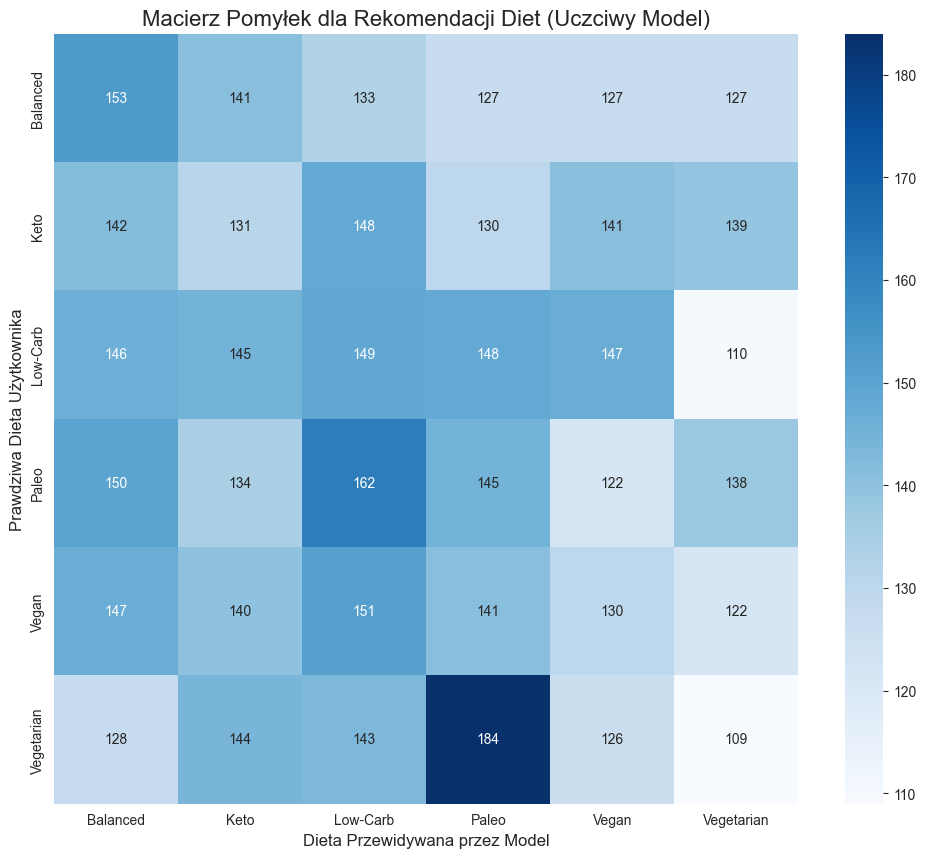

In [99]:
print("\nMacierz Pomyłek:")
cm = confusion_matrix(y_test, y_pred)
class_names = sorted(y.unique())

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Macierz Pomyłek dla Rekomendacji Diet (Uczciwy Model)', fontsize=16)
plt.xlabel('Dieta Przewidywana przez Model', fontsize=12)
plt.ylabel('Prawdziwa Dieta Użytkownika', fontsize=12)
plt.show()